In [ ]:
%matplotlib inline
# the above line is literally called magic. it basically is
# it helps with plotting in the notebooks

# we're going to need all of these so lets import now
# best practice of course is to do this in the first cell
import numpy as np  # common convention, lets stick to it
import scipy.optimize as opt  # we'll need this for fitting!
from matplotlib import pyplot as plt # also the common convention

In [ ]:
# start with linear data
# lets make a function that makes a line!

def line(x, m, b):
    # the order of these arguments is important later - first must be independent variable
    # and good practice
    # the x input is first because we will pass many x points

    return m * x + b  # as expected


x_data = np.arange(0, 10, 0.1)  # from 0 to 10 in steps of 0.1
y_data = line(x_data, 2, 0) # passing it into the line function defined above

plt.scatter(x_data, y_data)
plt.show()

In [ ]:
# boring but that's the point
# lets make something that looks like real data

x_data = np.arange(0, 10, 0.1)

# data isn't evenly spaced
# we're going to randomly choose points to keep
# we create a random array of boolean values
# then "slice" x_data; only the indices where cut is true will be kept
cut = np.random.choice(a=[False, True], size=x_data.shape)
print(len(x_data))
x_data = x_data[cut] # will select out the values at which cut is True
print(len(x_data))

y_data = line(x_data, 2, 0)

# cool but still a perfect line
# lets add noise to resemble real data

y_data_noisy = y_data + np.random.randn(len(y_data)) * 2

plt.scatter(x_data, y_data_noisy, c='b')
plt.plot(x_data, y_data, c='r')
plt.show() # to take out "Out[6]:"

In [ ]:
# now suppose we don't have y_data and know m or b, as usually happens
# that's where fitting comes in!

popt, pcov = opt.curve_fit(line, x_data, y_data_noisy)
# popt is optimal parameters in the order that they exist
# pcov is the covariance matrix --> ?

print(popt)
print(*popt)  # woah what's that *!?
# "Starred" expressions are very handy in python
# it means "unpack" basically. --> unpacks the tuple
# *popt is short hand for popt[0], popt[1], ... , popt[n]
# in this case its just 0 and 1, but this saves lots of typing!
# of course this is equivalent to the long version, as can be seen
print(popt[0], popt[1])


plt.scatter(x_data, y_data_noisy, c='b')
plt.plot(x_data, line(x_data, *popt), c='r') # passes in m and b as two arguments 
# without having to type all the parameters out
plt.show()

In [ ]:
# cool that's pretty close
# now let's try it on real data!

# we're going to use numpy's built in text file reader
# names=True means use headers
# delimiter="," is the character seperating the columns
# and many thanks to https://cdiac.ess-dive.lbl.gov/ftp/ndp030/global.1751_2011.ems
# for the data
data = np.genfromtxt("co2_emmissions.dat", names=True, delimiter=",")
# names=True --> the columns have titles
# delimiter --> distinguish between columns

# this structure is a numpy array, sometimes called a "rec array" because it has named columns
# we can see a row
print(data[0])
# we can see the names of the columns --> all float
print(data.dtype)
# and access data by column --> shows all the years
print(data["Year"])
# and as with all arrays we can access sub-pieces --> first ten years
print(data["Year"][:10])

In [ ]:
# cool lets see some trends!

plt.scatter(data["Year"], data["Total"]) # x-vals is Year, and y-vals is Total
plt.xlabel("Year")
plt.ylabel("CO$_2$ (Mega-tons)")
plt.show()

[ 2.69538514e-15  2.52267385e-02 -8.00971137e+00]


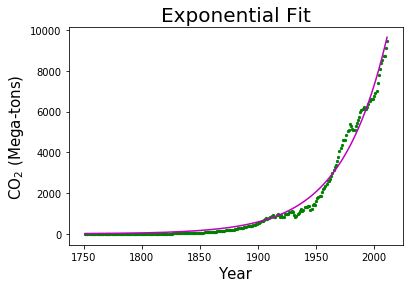

[ 2.47076404e-01 -9.05408454e+02  8.28906548e+05]


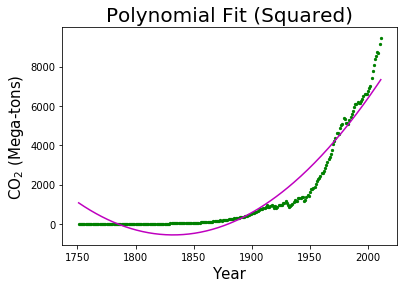

[ 1.69119544e-03 -9.29633945e+00  1.70284765e+04 -1.03939698e+07]


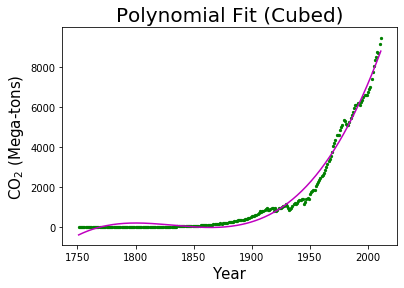

[ 6.75699200e-06 -4.91483968e-02  1.34048898e+02 -1.62479037e+05
  7.38450998e+07]


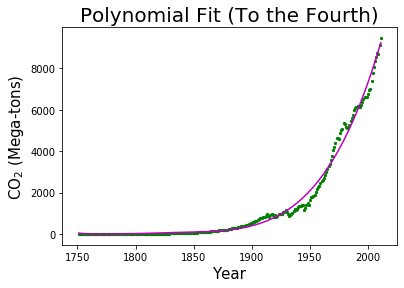

[ 2.03894216e-09 -1.24758929e-05  2.33803021e-02 -2.63279119e+00
 -3.37593590e+04  2.53829175e+07]


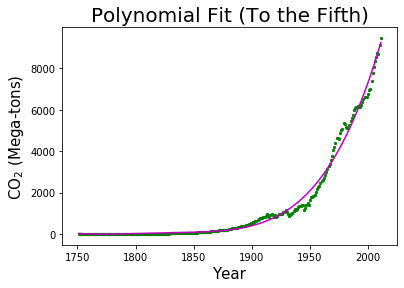

In [112]:
# Data Fitting

import numpy as np
import scipy.optimize as opt
from matplotlib import pyplot as plt
import numpy as np

data = np.genfromtxt("co2_emmissions.dat", names=True, delimiter=",")

def exponential(x, a, b, c):
    return a * np.exp(b * x + c)

def polynomial_squared(x,a,b,c):
    return (a * (x**2) + b * x + c)

def polynomial_cubed(x,a,b,c,d):
    return (a * (x**3)) + (b * (x**2)) + c * x + d

def polynomial_fourth(x,a,b,c,d,e):
    return (a * (x**4)) + (b * (x**3)) + (c * (x**2)) + d * x + e

def polynomial_fifth(x,a,b,c,d,e,f):
    return (a * (x**5)) + (b * (x**4)) + (c * (x**3)) + (d * (x**2)) + e * x + f

x_values = data["Year"]
y_values = data["Total"]

popt1, pcov1 = opt.curve_fit(exponential,x_values,y_values,p0=[1e-5,0.01,0.5])
# play with/estimate the numbers for p0
print(popt1)

plt.title("Exponential Fit",size=20)
plt.plot(x_values,exponential(x_values,*popt1),c='m')
plt.scatter(x_values,y_values,c='g',s=5)
plt.xlabel("Year",size=15)
plt.ylabel("CO$_2$ (Mega-tons)",size=15)
plt.show()

popt2, pcov2 = opt.curve_fit(polynomial_squared,x_values,y_values)
print(popt2)

plt.title("Polynomial Fit (Squared)",size=20)
plt.plot(x_values,polynomial_squared(x_values,*popt2),c='m')
plt.scatter(x_values,y_values,c='g',s=5)
plt.xlabel("Year",size=15)
plt.ylabel("CO$_2$ (Mega-tons)",size=15)
plt.show()

popt3, pcov3 = opt.curve_fit(polynomial_cubed,x_values,y_values)
print(popt3)

plt.title("Polynomial Fit (Cubed)",size=20)
plt.plot(x_values,polynomial_cubed(x_values,*popt3),c='m')
plt.scatter(x_values,y_values,c='g',s=5)
plt.xlabel("Year",size=15)
plt.ylabel("CO$_2$ (Mega-tons)",size=15)
plt.show()

popt4, pcov4 = opt.curve_fit(polynomial_fourth,x_values,y_values)
print(popt4)

plt.title("Polynomial Fit (To the Fourth)",size=20)
plt.plot(x_values,polynomial_fourth(x_values,*popt4),c='m')
plt.scatter(x_values,y_values,c='g',s=5)
plt.xlabel("Year",size=15)
plt.ylabel("CO$_2$ (Mega-tons)",size=15)
plt.show()

popt5, pcov5 = opt.curve_fit(polynomial_fifth,x_values,y_values)
print(popt5)

plt.title("Polynomial Fit (To the Fifth)",size=20)
plt.plot(x_values,polynomial_fifth(x_values,*popt5),c='m')
plt.scatter(x_values,y_values,c='g',s=5)
plt.xlabel("Year",size=15)
plt.ylabel("CO$_2$ (Mega-tons)",size=15)
plt.show()